In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'brain-tumor-mri-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1608934%2F2645886%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240923%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240923T152951Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D16421684f9e7362452f422f582c3e89902cdb8ac706e273e006fdbe7fb9b1bea02789ae6cd6bd8f6b28e0535b5595c16446f0fc88580a4334d08704ab5489b1ac64752bd8fbb78444389f80f15ceb75760e5fab735590a130ff24061dc8a611ed31d86cd92b4e341cdd62cada1fb4bb271a2f292730bb2199ef446c2cd8ef93a3de8fe680c65e4954e80ec9bf97967a7214b2d9b9859db6b78a2443cfff7e5050013c29ba3f3193addf080026684414acce4cec1785dba506baed5fa0c69c373bc4e327e0e042c9df6cbd29603352fe006df5176164b7402d0d53c71242960981dfaa038d2a4dc378d8adbbeaf637e911f97c134d6c392517bee081106ba377a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 155791278 bytes downloaded
Downloaded and uncompressed: brain-tumor-mri-dataset
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_1172.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0356.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0502.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0221.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0850.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0797.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0159.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0517.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0770.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_1063.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0297.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0999.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-me_0635.jpg


In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def preprocess_data(data_dir, img_size=(224, 224)):
    """
    Preprocesses the image data and labels from the given directory.

    Args:
        data_dir: The directory containing the image data organized into class folders.
        img_size: The desired size of the images (width, height).

    Returns:
        A tuple containing the preprocessed images and corresponding labels.
    """

    images = []
    labels = []

    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                try:
                    image = cv2.imread(image_path)
                    if image is not None:
                        image = cv2.resize(image, img_size)
                        images.append(image)
                        labels.append(class_name)
                except Exception as e:
                    print(f"Error processing image {image_path}: {e}")

    # Convert images and labels to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Encode labels to numerical values
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    return images, labels


# Example usage:
data_dir = '/kaggle/input/brain-tumor-mri-dataset/Training'  # Replace with the actual directory containing your data
images, labels = preprocess_data(data_dir)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)



Training data shape: (4569, 224, 224, 3)
Testing data shape: (1143, 224, 224, 3)


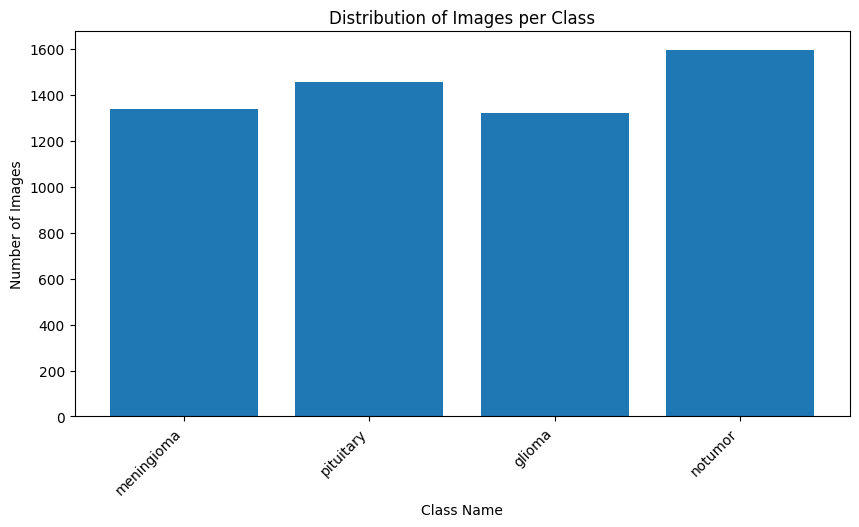

In [4]:
import os
import matplotlib.pyplot as plt

data_dir = '/kaggle/input/brain-tumor-mri-dataset/Training'  # Replace with the actual directory containing your data

class_counts = {}
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        class_counts[class_name] = len(os.listdir(class_dir))

# Plotting the class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Class")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


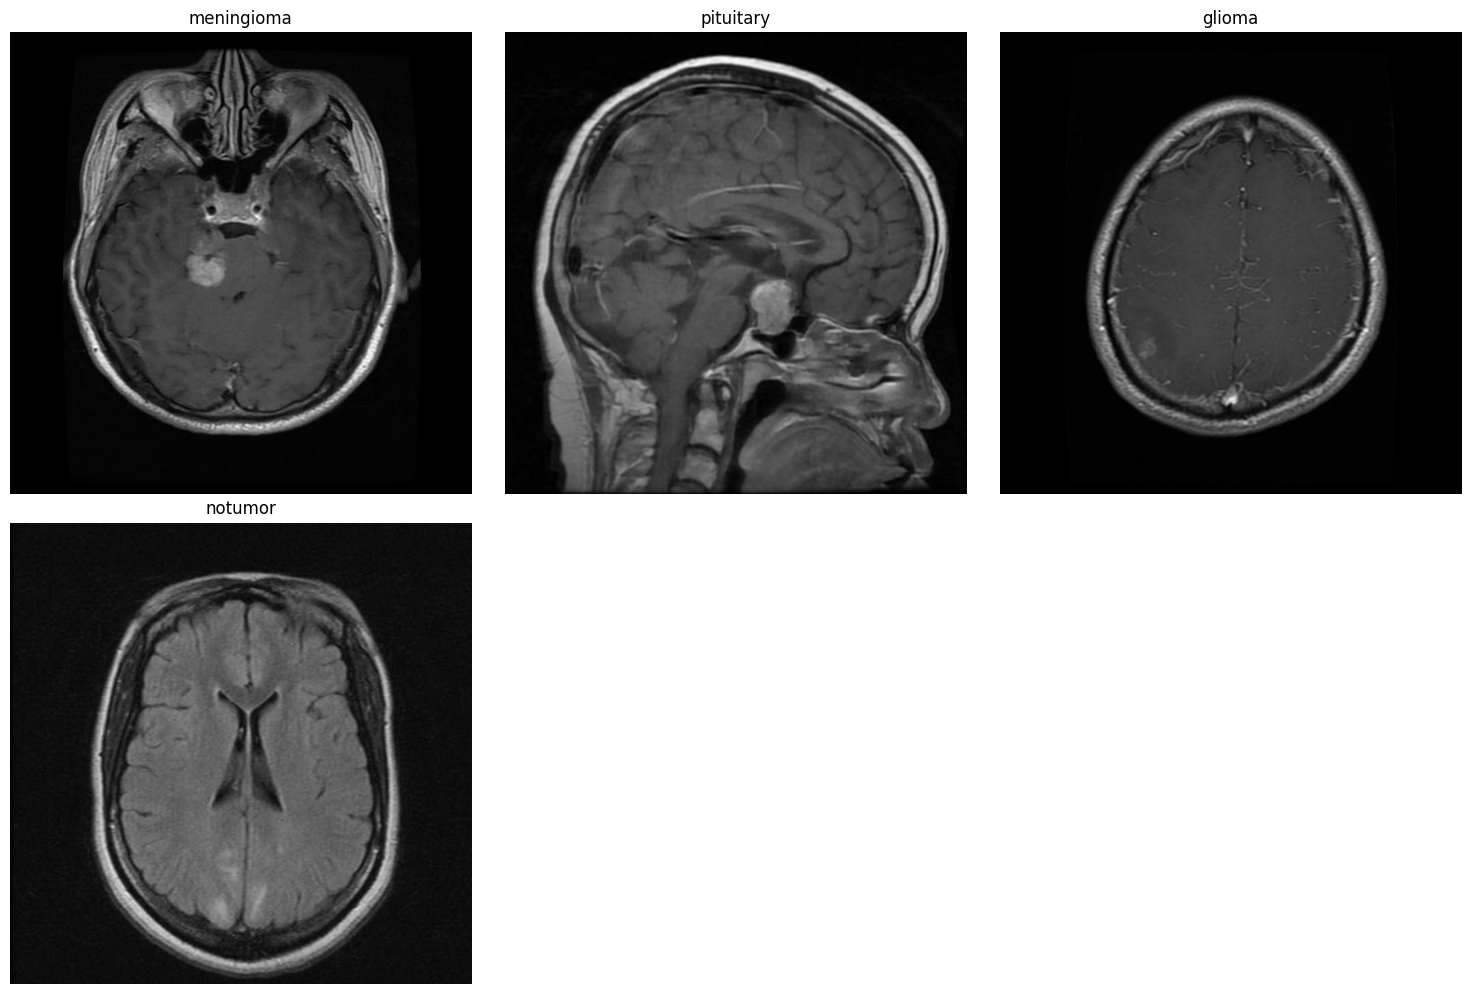

In [5]:
import matplotlib.pyplot as plt
import os
import cv2

data_dir = '/kaggle/input/brain-tumor-mri-dataset/Training'

# Create a dictionary to store a sample image for each class
class_images = {}

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            try:
                image = cv2.imread(image_path)
                if image is not None:
                    class_images[class_name] = image
                    break  # Only take one sample image per class
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")


# Visualize the sample images
plt.figure(figsize=(15, 10))
for i, (class_name, image) in enumerate(class_images.items()):
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
class VGG16(nn.Module):
    def __init__(self, num_classes=1000):
        super(VGG16, self).__init__()

        # Block 1
        self.conv1_1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 2
        self.conv2_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 3
        self.conv3_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 4
        self.conv4_1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.conv4_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv4_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 5
        self.conv5_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv5_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv5_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.maxpool5 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(512 * 7 * 7, 4096)  # VGG16 standard input is 224x224, maxpool reduces by 2^5
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)

    def forward(self, x):
        # Block 1
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = self.maxpool1(x)

        # Block 2
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.maxpool2(x)

        # Block 3
        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = F.relu(self.conv3_3(x))
        x = self.maxpool3(x)

        # Block 4
        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = F.relu(self.conv4_3(x))
        x = self.maxpool4(x)

        # Block 5
        x = F.relu(self.conv5_1(x))
        x = F.relu(self.conv5_2(x))
        x = F.relu(self.conv5_3(x))
        x = self.maxpool5(x)

        # Flatten
        x = torch.flatten(x, 1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [8]:
# Initialize the model
model = VGG16(num_classes=4)  # Assuming 10 classes
print(model)

VGG16(
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4_1): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (

In [9]:
import numpy as np
def preprocess_train_data(data_dir, img_size=(224, 224)):
    """
    Preprocesses the training image data and labels from the given directory.

    Args:
        data_dir: The directory containing the image data organized into class folders.
        img_size: The desired size of the images (width, height).

    Returns:
        A tuple containing the preprocessed images and corresponding labels.
    """

    images = []
    labels = []

    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                try:
                    image = cv2.imread(image_path)
                    if image is not None:
                        image = cv2.resize(image, img_size)
                        images.append(image)
                        labels.append(class_name)
                except Exception as e:
                    print(f"Error processing image {image_path}: {e}")

    # Convert images and labels to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Encode labels to numerical values
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    return images, labels

# Example usage:
train_data_dir = '/kaggle/input/brain-tumor-mri-dataset/Training'
X_train, y_train = preprocess_train_data(train_data_dir)

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)

Training data shape: (5712, 224, 224, 3)
Training labels shape: (5712,)


In [10]:
!nvidia-smi


Tue Sep 24 05:34:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [12]:
import numpy as np
def preprocess_test_data(data_dir, img_size=(224, 224)):
    """
    Preprocesses the test image data and labels from the given directory.

    Args:
        data_dir: The directory containing the image data organized into class folders.
        img_size: The desired size of the images (width, height).

    Returns:
        A tuple containing the preprocessed images and corresponding labels.
    """

    images = []
    labels = []

    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                try:
                    image = cv2.imread(image_path)
                    if image is not None:
                        image = cv2.resize(image, img_size)
                        images.append(image)
                        labels.append(class_name)
                except Exception as e:
                    print(f"Error processing image {image_path}: {e}")

    # Convert images and labels to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Encode labels to numerical values
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    return images, labels

# Example usage:
test_data_dir = '/kaggle/input/brain-tumor-mri-dataset/Testing'
X_test, y_test = preprocess_test_data(test_data_dir)

print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

# Combine training and test data
X_train_combined = np.concatenate((X_train, X_test), axis=0)
y_train_combined = np.concatenate((y_train, y_test), axis=0)

print("Combined training data shape:", X_train_combined.shape)
print("Combined training labels shape:", y_train_combined.shape)


Testing data shape: (1311, 224, 224, 3)
Testing labels shape: (1311,)
Combined training data shape: (7023, 224, 224, 3)
Combined training labels shape: (7023,)


In [13]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assuming X_train and y_train are your training data and labels
X_train_tensor = torch.from_numpy(X_train).float()
# Add the permute function to change the order of the dimensions
X_train_tensor = X_train_tensor.permute(0, 3, 1, 2) # Change the order of dimensions from [batch_size, height, width, channels] to [batch_size, channels, height, width]
y_train_tensor = torch.from_numpy(y_train).long()

# Create a DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epoch_loss_history = []

# Training loop
num_epochs = 10  # Adjust as needed
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Move inputs and labels to the device (GPU if available)
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 179 == 0:  # Print every 20 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0
    epoch_loss = running_loss / len(train_loader)
    epoch_loss_history.append(epoch_loss)

[1,     1] loss: 0.069
[2,     1] loss: 0.054
[3,     1] loss: 0.028
[4,     1] loss: 0.066
[5,     1] loss: 0.052
[6,     1] loss: 0.021
[7,     1] loss: 0.016
[8,     1] loss: 0.015
[9,     1] loss: 0.018
[10,     1] loss: 0.008


In [14]:
# Assuming X_train_combined and y_train_combined are your training data and labels
X_train_tensor = torch.from_numpy(X_train_combined).float()
# Add the permute function to change the order of the dimensions
X_train_tensor = X_train_tensor.permute(0, 3, 1, 2) # Change the order of dimensions from [batch_size, height, width, channels] to [batch_size, channels, height, width]
y_train_tensor = torch.from_numpy(y_train_combined).long()

# Create a DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epoch_loss_history2 = []

# Training loop
num_epochs = 10  # Adjust as needed
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Move inputs and labels to the device (GPU if available)
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i+1 % 179 == 0:  # Print every 20 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0
    epoch_loss = running_loss / len(train_loader)
    epoch_loss_history2.append(epoch_loss)


[1,     1] loss: 0.013
[1,   180] loss: 2.306
[2,     1] loss: 0.011
[2,   180] loss: 2.037
[3,     1] loss: 0.007
[3,   180] loss: 1.783
[4,     1] loss: 0.013
[4,   180] loss: 1.526
[5,     1] loss: 0.019
[5,   180] loss: 1.463
[6,     1] loss: 0.016
[6,   180] loss: 1.922
[7,     1] loss: 0.007
[7,   180] loss: 1.161
[8,     1] loss: 0.005
[8,   180] loss: 0.842
[9,     1] loss: 0.006
[9,   180] loss: 0.654
[10,     1] loss: 0.002
[10,   180] loss: 0.554


In [15]:
# Assuming X_test and y_test are your test data and labels
X_test_tensor = torch.from_numpy(X_test).float()
X_test_tensor = X_test_tensor.permute(0, 3, 1, 2)  # Change the order of dimensions
y_test_tensor = torch.from_numpy(y_test).long()

# Create a DataLoader for testing
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Set the model to evaluation mode
model.eval()

correct = 0
total = 0

# Iterate through the test data
with torch.no_grad():
    for data in test_loader:
        images, labels = data

        # Move data to the device (GPU if available)
        images = images.to(device)
        labels = labels.to(device)

        # Get model predictions
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Update total and correct counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print('Accuracy of the network on the test images: %d %%' % (accuracy))


Accuracy of the network on the test images: 96 %


In [16]:
torch.save(model.state_dict(), 'modelv16.h5')
